### Подготовка

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv("seattle-weather.csv")

df.shape
df.isnull().sum()

Y = df['weather']
X = df.drop(['date', 'weather'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=1461-400, shuffle=False)

### KNeighborsClassifier

In [2]:
from sklearn.neighbors import KNeighborsClassifier

kn_clf = KNeighborsClassifier(n_neighbors=3).fit(X_train, Y_train)
Y_pred = kn_clf.predict(X_test)

accuracy_score(Y_test, Y_pred)

0.6875

### Stochastic gradient descent (SGD)

In [3]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(n_jobs=-1).fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

accuracy_score(Y_test, Y_pred)

0.7625

#### Так как модель выдает относительно плохой результат, попробуем улучшить

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    4.7s remaining:   14.2s
[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:    4.7s remaining:    7.9s
[Parallel(n_jobs=-1)]: Done   4 out of   8 | elapsed:    4.8s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done   5 out of   8 | elapsed:    4.8s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:    4.9s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    5.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    5.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.0s finished


-------------SCORING MODELS-------------


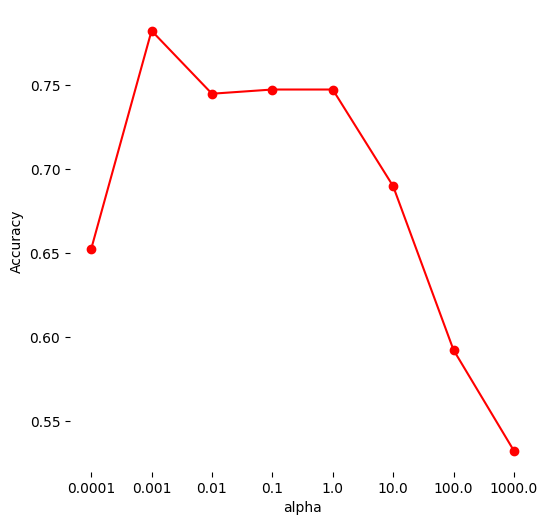

In [4]:
from sklearn.model_selection import ParameterGrid
import parfit.parfit as pf


grid = {
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], # learning rate
    'loss': ['log'], # logistic regression
    'penalty': ['l2'], # L2 Regularization. Add a penalty to reduces the overfitting
    'n_jobs': [-1]  # Run using all processors
}
paramGrid = ParameterGrid(grid)

bestModel, bestScore, allModels, allScores = pf.bestFit(
    SGDClassifier, paramGrid, X_train, Y_train, X_test, Y_test, 
    metric = accuracy_score, scoreLabel = "Accuracy")

In [5]:
print(bestModel, bestScore, sep='\n\n')

SGDClassifier(alpha=0.001, loss='log', n_jobs=-1)

0.7825


### RandomForestClassifier

In [6]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(criterion="entropy", min_samples_leaf=1, n_jobs=-1).fit(X_train, Y_train)
Y_pred = rf_clf.predict(X_test)

accuracy_score(Y_test, Y_pred)

0.825

### Gradient Boosting

In [7]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(max_depth=3, learning_rate=0.1, n_estimators=50).fit(X_train, Y_train)
Y_pred = gb_clf.predict(X_test)

accuracy_score(Y_test, Y_pred)

0.8225

## Дополнительные методы

### LogisticRegressionCV

In [20]:
from sklearn.linear_model import LogisticRegressionCV

lrcv = LogisticRegressionCV(cv=5, random_state=0).fit(X_train, Y_train)
Y_pred = lrcv.predict(X_test)

accuracy_score(Y_test, Y_pred)

0.8375

### RidgeClassifierCV

In [9]:
from sklearn.linear_model import RidgeClassifierCV

rccv = RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X_train, Y_train)
Y_pred = rccv.predict(X_test)

accuracy_score(Y_test, Y_pred)

0.705

### PassiveAggressiveClassifier

In [10]:
from sklearn.linear_model import PassiveAggressiveClassifier

pa_clf = PassiveAggressiveClassifier(max_iter=1000, random_state=0, tol=1e-3).fit(X_train, Y_train)
Y_pred = pa_clf.predict(X_test)

accuracy_score(Y_test, Y_pred)

0.6825

### RadiusNeighborsClassifier

In [11]:
from sklearn.neighbors import RadiusNeighborsClassifier

neigh = RadiusNeighborsClassifier(radius=7.8).fit(X_train, Y_train)
Y_pred = neigh.predict(X_test)

accuracy_score(Y_test, Y_pred)

0.675

### GaussianProcessClassifier

In [13]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

gpc = GaussianProcessClassifier().fit(X_train, Y_train)
Y_pred = gpc.predict(X_test)

accuracy_score(Y_test, Y_pred)

0.74